In [ ]:
import tensorflow as tf
from tensorflow import keras
tf.__version__

'2.15.0'

In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [ ]:
cd /content/drive/MyDrive/ML

/content/drive/MyDrive/ML


In [ ]:
ls

archive.zip  Mask_reconize.ipynb  test2.png  test4.png  thangcv.ipynb
data/        mymodel.h5           test3.png  test.png   Untitled0.ipynb


In [ ]:
data = "./"

In [ ]:
!unzip -q archive.zip -d $data

In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2
from google.colab.patches import cv2_imshow
from PIL import Image
from sklearn.model_selection import train_test_split

In [ ]:
with_mask_files = os.listdir('/content/drive/MyDrive/ML/data/with_mask')
print(with_mask_files[0:5])
print(with_mask_files[-5:])

['with_mask_3381.jpg', 'with_mask_3351.jpg', 'with_mask_337.jpg', 'with_mask_3405.jpg', 'with_mask_3453.jpg']
['with_mask_1832.jpg', 'with_mask_1537.jpg', 'with_mask_1221.jpg', 'with_mask_1503.jpg', 'with_mask_1600.jpg']


In [ ]:
without_mask_files = os.listdir('/content/drive/MyDrive/ML/data/without_mask')
print(without_mask_files[0:5])
print(without_mask_files[-5:])

['without_mask_3260.jpg', 'without_mask_3371.jpg', 'without_mask_410.jpg', 'without_mask_2859.jpg', 'without_mask_347.jpg']
['without_mask_2089.jpg', 'without_mask_1794.jpg', 'without_mask_1965.jpg', 'without_mask_2547.jpg', 'without_mask_2300.jpg']


In [ ]:
print('Number of with mask images:', len(with_mask_files))
print('Number of without mask images:', len(without_mask_files))

Number of with mask images: 3725
Number of without mask images: 3828


In [ ]:
with_mask_labels = [1]*3725

without_mask_labels = [0]*3828

print(with_mask_labels[0:5])

print(without_mask_labels[0:5])

[1, 1, 1, 1, 1]
[0, 0, 0, 0, 0]


In [ ]:
print(len(with_mask_labels))
print(len(without_mask_labels))

3725
3828


In [ ]:
labels = with_mask_labels + without_mask_labels

print(len(labels))
print(labels[0:5])
print(labels[-5:])

7553
[1, 1, 1, 1, 1]
[0, 0, 0, 0, 0]


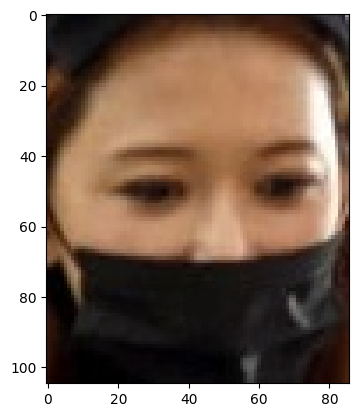

In [ ]:
# displaying with mask image
img = mpimg.imread('/content/drive/MyDrive/ML/data/with_mask/with_mask_100.jpg')
imgplot = plt.imshow(img)
plt.show()

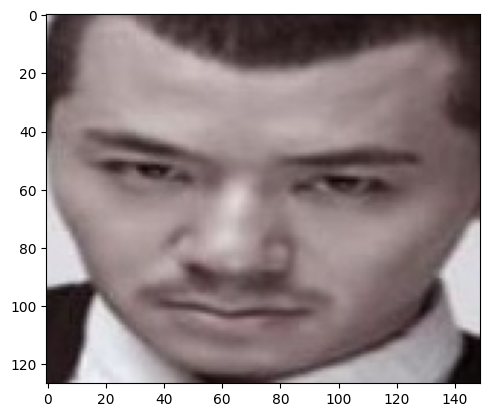

In [ ]:
# displaying without mask image
img = mpimg.imread('/content/drive/MyDrive/ML/data/without_mask/without_mask_100.jpg')
imgplot = plt.imshow(img)
plt.show()

**Image Processing**

1. Resize the Images

2. Convert the images to numpy arrays

In [ ]:
# convert images to numpy arrays+

with_mask_path = '/content/drive/MyDrive/ML/data/with_mask/'

data = []

for img_file in with_mask_files:
  image = Image.open(with_mask_path + img_file)
  image = image.resize((128,128))
  image = image.convert('RGB')
  image = np.array(image)
  data.append(image)


without_mask_path = '/content/drive/MyDrive/ML/data/without_mask/'

for img_file in without_mask_files:
  image = Image.open(without_mask_path + img_file)
  image = image.resize((128,128))
  image = image.convert('RGB')
  image = np.array(image)
  data.append(image)

/usr/local/lib/python3.10/dist-packages/PIL/Image.py:996: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


In [ ]:
type(data)

list

In [ ]:
len(data)

7553

In [ ]:
data[0]

array([[[221, 231, 238],
        [238, 242, 248],
        [246, 247, 251],
        ...,
        [249, 249, 251],
        [249, 249, 251],
        [249, 249, 251]],

       [[218, 228, 235],
        [238, 243, 248],
        [246, 247, 251],
        ...,
        [249, 249, 251],
        [249, 249, 251],
        [249, 249, 251]],

       [[215, 226, 232],
        [238, 242, 248],
        [246, 247, 251],
        ...,
        [249, 249, 251],
        [249, 249, 251],
        [249, 249, 251]],

       ...,

       [[ 49,  56,  65],
        [ 74,  77,  81],
        [ 56,  66,  70],
        ...,
        [122, 112, 103],
        [119, 109, 101],
        [108, 100,  90]],

       [[ 48,  57,  65],
        [ 72,  75,  79],
        [ 59,  64,  66],
        ...,
        [118, 110, 101],
        [120, 109, 100],
        [111, 101,  94]],

       [[ 45,  53,  62],
        [ 71,  74,  78],
        [ 65,  70,  69],
        ...,
        [112, 104,  95],
        [118, 107,  98],
        [108,  98,  91]]

In [ ]:
type(data[0])

numpy.ndarray

In [ ]:
data[0].shape

(128, 128, 3)

In [ ]:
# convert image list and label list to numpy arrays
X = np.array(data)
Y = np.array(labels)

In [ ]:
type(X)

numpy.ndarray

In [ ]:
type(Y)

numpy.ndarray

In [ ]:
print(X.shape)
print(Y.shape)

(7553, 128, 128, 3)
(7553,)


In [ ]:
print(Y)

[1 1 1 ... 0 0 0]


**Train Test Split**

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)
print(X.shape, X_train.shape, X_test.shape)
print(Y.shape, Y_train.shape, Y_test.shape)

(7553, 128, 128, 3) (6042, 128, 128, 3) (1511, 128, 128, 3)
(7553,) (6042,) (1511,)


In [ ]:
# scaling the data

X_train_scaled = X_train/255

X_test_scaled = X_test/255

In [ ]:
X_train[10]

array([[[90, 77, 68],
        [93, 80, 71],
        [98, 85, 77],
        ...,
        [24, 38, 38],
        [44, 58, 58],
        [55, 69, 69]],

       [[90, 76, 68],
        [92, 80, 70],
        [97, 84, 73],
        ...,
        [18, 32, 32],
        [24, 38, 38],
        [28, 41, 41]],

       [[83, 71, 61],
        [84, 73, 62],
        [87, 76, 64],
        ...,
        [33, 48, 48],
        [22, 37, 37],
        [17, 32, 31]],

       ...,

       [[63, 56, 50],
        [63, 56, 52],
        [64, 57, 53],
        ...,
        [64, 47, 37],
        [69, 52, 42],
        [72, 55, 45]],

       [[65, 58, 52],
        [65, 58, 52],
        [65, 58, 53],
        ...,
        [66, 49, 40],
        [69, 52, 42],
        [71, 54, 44]],

       [[66, 59, 53],
        [66, 59, 53],
        [66, 59, 53],
        ...,
        [68, 51, 41],
        [69, 52, 42],
        [70, 53, 43]]], dtype=uint8)

In [ ]:
X_train_scaled[10]

array([[[0.35294118, 0.30196078, 0.26666667],
        [0.36470588, 0.31372549, 0.27843137],
        [0.38431373, 0.33333333, 0.30196078],
        ...,
        [0.09411765, 0.14901961, 0.14901961],
        [0.17254902, 0.22745098, 0.22745098],
        [0.21568627, 0.27058824, 0.27058824]],

       [[0.35294118, 0.29803922, 0.26666667],
        [0.36078431, 0.31372549, 0.2745098 ],
        [0.38039216, 0.32941176, 0.28627451],
        ...,
        [0.07058824, 0.1254902 , 0.1254902 ],
        [0.09411765, 0.14901961, 0.14901961],
        [0.10980392, 0.16078431, 0.16078431]],

       [[0.3254902 , 0.27843137, 0.23921569],
        [0.32941176, 0.28627451, 0.24313725],
        [0.34117647, 0.29803922, 0.25098039],
        ...,
        [0.12941176, 0.18823529, 0.18823529],
        [0.08627451, 0.14509804, 0.14509804],
        [0.06666667, 0.1254902 , 0.12156863]],

       ...,

       [[0.24705882, 0.21960784, 0.19607843],
        [0.24705882, 0.21960784, 0.20392157],
        [0.25098039, 0

**Building a Convolutional Neural Networks (CNN)**

In [ ]:
import tensorflow as tf
from tensorflow import keras

**Build function replace Conv2D in Keras**

In [ ]:
from keras.layers import Layer
class Conv2DLayer(Layer):
    def __init__(self, num_filters, kernel_size, activation='relu', **kwargs):
        self.num_filters = num_filters
        self.kernel_size = kernel_size
        self.activation = activation
        super(Conv2DLayer, self).__init__(**kwargs)

    def build(self, input_shape):
        input_height, input_width, input_channels = input_shape[1:]
        self.kernel_height, self.kernel_width = self.kernel_size
        self.output_height = input_height - self.kernel_height + 1
        self.output_width = input_width - self.kernel_width + 1

        self.kernel = self.add_weight(name='kernel',
                                      shape=(self.kernel_height, self.kernel_width, input_channels, self.num_filters),
                                      initializer='uniform',
                                      trainable=True)
        super(Conv2DLayer, self).build(input_shape)

    def call(self, inputs):
        batch_size = tf.shape(inputs)[0]
        result = tf.TensorArray(tf.float32, size=batch_size)

        for i in range(batch_size):
            result_i = tf.TensorArray(tf.float32, size=self.num_filters)
            for f in range(self.num_filters):
                for j in range(self.output_height):
                    for k in range(self.output_width):
                        result_i = result_i.write(f, tf.reduce_sum(inputs[i, j:j+self.kernel_height, k:k+self.kernel_width, :] * self.kernel[:, :, :, f]))
            result = result.write(i, tf.transpose(result_i.stack(), [1, 2, 0]))  # Transpose để có đúng kích thước output


        result = result.stack()
        if self.activation == 'relu':
            result = tf.nn.relu(result)

        return result

**Build function replace MaxPooling2D in Keras**

In [ ]:
import tensorflow as tf
from keras.layers import Layer

class MaxPooling2DLayer(Layer):
    def __init__(self, pool_size=(2, 2), **kwargs):
        self.pool_size = pool_size
        super(MaxPooling2DLayer, self).__init__(**kwargs)

    def build(self, input_shape):
        super(MaxPooling2DLayer, self).build(input_shape)

    def call(self, inputs):
        batch_size, input_height, input_width, num_filters = tf.shape(inputs)
        pool_height, pool_width = self.pool_size

        output_height = input_height // pool_height
        output_width = input_width // pool_width

        result = tf.TensorArray(tf.float32, size=batch_size)

        for i in range(batch_size):
            result_i = tf.TensorArray(tf.float32, size=num_filters)
            for f in range(num_filters):
                for j in range(output_height):
                    for k in range(output_width):
                        result_i = result_i.write(f, tf.reduce_max(inputs[i, j*pool_height:(j+1)*pool_height, k*pool_width:(k+1)*pool_width, f]))
            result = result.write(i, tf.transpose(result_i.stack(), [1, 2, 0]))

        return result.stack()


In [ ]:
num_of_classes = 2

model = keras.Sequential()

model.add(Conv2DLayer(32, kernel_size=(3, 3), activation='relu', input_shape=(128, 128, 3)))
model.add(MaxPooling2DLayer(pool_size=(2, 2)))

model.add(Conv2DLayer(64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2DLayer(pool_size=(2, 2)))

model.add(keras.layers.Flatten())

model.add(keras.layers.Dense(128, activation='relu'))
model.add(keras.layers.Dropout(0.5))

model.add(keras.layers.Dense(64, activation='relu'))
model.add(keras.layers.Dropout(0.5))


model.add(keras.layers.Dense(num_of_classes, activation='sigmoid'))

# compile the neural network
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['acc'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 126, 126, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 63, 63, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 61, 61, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 30, 30, 64)        0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 57600)             0         
                                                                 
 dense (Dense)               (None, 128)               7

In [ ]:
# training the neural network
history = model.fit(X_train_scaled, Y_train, validation_split=0.1, epochs=5)

Epoch 1/5
170/170 [==============================] - 150s 871ms/step - loss: 0.5204 - acc: 0.7969 - val_loss: 0.3053 - val_acc: 0.8744
Epoch 2/5
170/170 [==============================] - 146s 858ms/step - loss: 0.3084 - acc: 0.8806 - val_loss: 0.2353 - val_acc: 0.8975
Epoch 3/5
170/170 [==============================] - 146s 862ms/step - loss: 0.2534 - acc: 0.9001 - val_loss: 0.2274 - val_acc: 0.9124
Epoch 4/5
170/170 [==============================] - 145s 852ms/step - loss: 0.2148 - acc: 0.9150 - val_loss: 0.2248 - val_acc: 0.9074
Epoch 5/5
170/170 [==============================] - 152s 889ms/step - loss: 0.2001 - acc: 0.9240 - val_loss: 0.1972 - val_acc: 0.9190


In [ ]:
loss, accuracy = model.evaluate(X_test_scaled, Y_test)
print('Test Accuracy =', accuracy)

48/48 [==============================] - 11s 225ms/step - loss: 0.1852 - acc: 0.9219
Test Accuracy = 0.9219059944152832


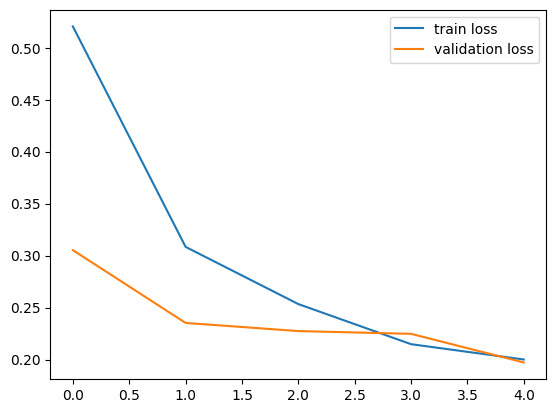

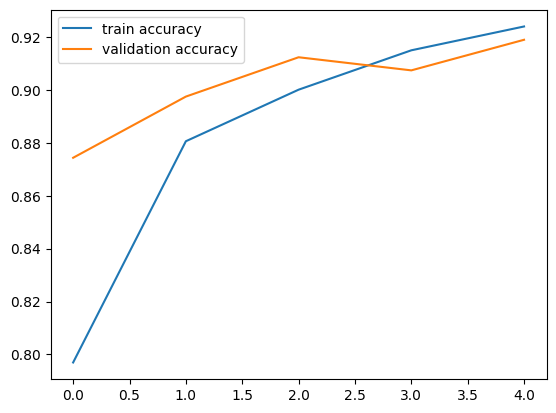

In [ ]:
h = history

# plot the loss value
plt.plot(h.history['loss'], label='train loss')
plt.plot(h.history['val_loss'], label='validation loss')
plt.legend()
plt.show()

# plot the accuracy value
plt.plot(h.history['acc'], label='train accuracy')
plt.plot(h.history['val_acc'], label='validation accuracy')
plt.legend()
plt.show()

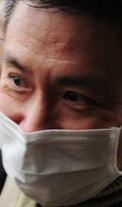

1/1 [==============================] - 0s 159ms/step
[[0.2647736  0.81312084]]
1
The person in the image is wearing a mask


In [ ]:
# path_ip = '/content/drive/MyDrive/ML/data/without_mask/without_mask_1000.jpg'
# input_image_path = input('Path of the image to be predicted: ')

input_image = cv2.imread('/content/drive/MyDrive/ML/data/with_mask/with_mask_20.jpg')

cv2_imshow(input_image)

input_image_resized = cv2.resize(input_image, (128,128))

input_image_scaled = input_image_resized/255

input_image_reshaped = np.reshape(input_image_scaled, [1,128,128,3])

input_prediction = model.predict(input_image_reshaped)

print(input_prediction)


input_pred_label = np.argmax(input_prediction)

print(input_pred_label)


if input_pred_label == 1:

  print('The person in the image is wearing a mask')

else:

  print('The person in the image is not wearing a mask')


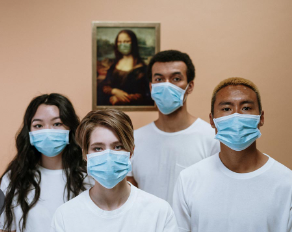

1/1 [==============================] - 0s 30ms/step
[[0.3914206 0.6234203]]
1
The person in the image is wearing a mask


In [ ]:
input_image = cv2.imread('/content/drive/MyDrive/ML/test4.png')

cv2_imshow(input_image)

input_image_resized = cv2.resize(input_image, (128,128))

input_image_scaled = input_image_resized/255

input_image_reshaped = np.reshape(input_image_scaled, [1,128,128,3])

input_prediction = model.predict(input_image_reshaped)

print(input_prediction)


input_pred_label = np.argmax(input_prediction)

print(input_pred_label)


if input_pred_label == 1:

  print('The person in the image is wearing a mask')

else:

  print('The person in the image is not wearing a mask')

In [ ]:
model.save('/content/drive/MyDrive/ML/mask_model.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
